In [1]:
# Author: Arthur Prigent
# Email: aprigent@ictp.it

In [1]:
from load_librairies import *
from scipy.stats.stats import pearsonr
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy
%matplotlib inline 
def nandetrend(y):
    ''' Remove the linear trend from the data '''
    
    x = np.arange(0,y.shape[0],1)
    m, b, r_val, p_val, std_err = stats.linregress(x,np.array(y))
    y_detrended= np.array(y) - m*x
    return y_detrended
import scipy

def is_jja(month):
    return (month>=6) & (month<=8)

def is_amj(month):
    return (month>=4) & (month<=6)
dir_proj = '/home/netapp-clima-users/users/aprigent/Projects/TAV_OMIP/'
path_fig = dir_proj+'/figures_final/'


dir_tos_omip1 = '/home/netapp-clima-users/users/aprigent/CMIP6/ocean/omip1/tos/mon/'
dir_tos_omip2 = '/home/netapp-clima-users/users/aprigent/CMIP6/ocean/omip2/tos/mon/'


dir_zos_omip1 = '/home/netapp-clima-users/users/aprigent/CMIP6/ocean/omip1/zos/mon/'
dir_zos_omip2 = '/home/netapp-clima-users/users/aprigent/CMIP6/ocean/omip2/zos/mon/'

dir_oras5 = '/home/netapp-clima-users/users/aprigent/Observations/ORA-S5/'



#dir_obs_sst = '/home/netapp-clima-users/users/aprigent/Observations/HadI-SST/'
dir_obs_sst = '/home/netapp-clima-users/users/aprigent/Observations/'


path_data_out = '/media/aprigent/Arthur_disk/data_uncertainty/'

dir_ccmp = '/media/aprigent/Arthur_disk/TAV_OMIP/'

period_str = 1985
period_end = 2004


/tmp/ipykernel_9903/3038832452.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


# Load JRA55
- TAV_OMIP/bash/extract_uas_JRA55do.sh
- TAV_OMIP/bash/extract_uas_JRA55do_atl.sh


### UAS

In [2]:

uas_jra55_mon = xr.open_dataset('/media/aprigent/Arthur_disk/Data/MOM_JRA55do/JRA_uas.1958_2022_atl4_monmean.nc')
uas_jra55_eq_mon = xr.open_dataset('/media/aprigent/Arthur_disk/Data/MOM_JRA55do/JRA_uas.1958_2022_eq_monmean.nc')
uas_jra55_atl_mon = xr.open_dataset('/media/aprigent/Arthur_disk/Data/MOM_JRA55do/JRA_uas.1958_2022_atl_monmean.nc',
                            use_cftime=True)
uas_jra55_eq_mon = uas_jra55_eq_mon.sel(time=slice(datetime(period_str, 1, 1),
                                                               datetime(period_end, 12, 31)))

In [3]:
uas_jra55_eq_arr = np.array(uas_jra55_eq_mon.uas)
uas_jra55_eq_dtd = np.ones((uas_jra55_eq_mon.uas.shape))*np.nan
for i in range(uas_jra55_eq_dtd.shape[1]):
    for j in range(uas_jra55_eq_dtd.shape[2]):
        uas_jra55_eq_dtd[:,i,j] = nandetrend(uas_jra55_eq_arr[:,i,j])

        
uas_jra55_eq_dataset = xr.Dataset({'uas_dtd': (['time','lat','lon'], uas_jra55_eq_dtd), 
    }, 
    coords={'time': np.array(uas_jra55_eq_mon.time), 
    'lat': np.array(uas_jra55_eq_mon.lat), 
    'lon': np.array(uas_jra55_eq_mon.lon)} ) 



uas_jra55_eq_dataset_monthly = uas_jra55_eq_dataset.sel(time=slice(datetime(period_str, 1, 1),
                                                               datetime(period_end, 12, 31)))

In [4]:
uasa_jra55_eq_dataset_monthly,_ = Atools.ano_norm_t(uas_jra55_eq_dataset_monthly.uas_dtd)

In [5]:
uasa_jra55_eq_dataset_monthly_mean = uasa_jra55_eq_dataset_monthly.mean(dim='lat')

std_uasa_jra55_eq_dataset_monthly_mean = uasa_jra55_eq_dataset_monthly_mean.groupby('time.month').std()

### ZOS
- TAV_OMIP/scripts/processing/prepare_zos_omip2.ipynb

In [6]:
zos_eq_omip2_tmp = xr.open_dataset(path_data_out+'zos_omip2_atl_1985_2004.nc')
zosa_eq_omip2 = Atools.data_sub(zos_eq_omip2_tmp,-40,10,-3,3)
zosa_eq_omip2_mean = zosa_eq_omip2.zosa_atl.mean(dim='lat')
var_zosa_eq_omip2_mean_monthly_mean = zosa_eq_omip2_mean.groupby('time.month').var()
std_zosa_eq_omip2_mean_monthly_mean = np.sqrt(var_zosa_eq_omip2_mean_monthly_mean.mean(dim='model'))

# TOS
- TAV_OMIP/scripts/figure_01_map_std_ssta.ipynb

In [7]:
ssta_omip2_atl_tmp = xr.open_dataset(path_data_out+'sst_ssta_omip2_atl_1985_2004.nc')
ssta_omip2_eq = Atools.data_sub(ssta_omip2_atl_tmp,-40,10,-3,3)
ssta_omip2_eq_mean = ssta_omip2_eq.ssta.mean(dim='lat')
var_ssta_omip2_eq_mean_monthly_mean = ssta_omip2_eq_mean.groupby('time.month').var()
std_ssta_omip2_eq_mean_monthly_mean = np.sqrt(var_ssta_omip2_eq_mean_monthly_mean.mean(dim='model'))

# Load CORE-II
- TAV_OMIP/bash/extract_uas_CORE2.sh
- TAV_OMIP/bash/extract_uas_CORE2_atl.sh 

### UAS

In [8]:

uas_core2_eq_mon = xr.open_dataset('/media/aprigent/Arthur_disk/Data/CORE2/u_10_mod.1948-2007.paddednomads_eq_monmean.nc',
                            use_cftime=True)
uas_core2_eq_mon['TIME'] = uas_core2_eq_mon.indexes['TIME'].to_datetimeindex()

uas_core2_eq_mon = uas_core2_eq_mon.sel(TIME=slice(datetime(period_str, 1, 1),
                                                               datetime(period_end, 12, 31)))

/tmp/ipykernel_9903/2154224562.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  uas_core2_eq_mon['TIME'] = uas_core2_eq_mon.indexes['TIME'].to_datetimeindex()


In [9]:
uas_core2_eq_arr = np.array(uas_core2_eq_mon.U_10_MOD)
uas_core2_eq_dtd = np.ones((uas_core2_eq_mon.U_10_MOD.shape))*np.nan
for i in range(uas_core2_eq_dtd.shape[1]):
    for j in range(uas_core2_eq_dtd.shape[2]):
        uas_core2_eq_dtd[:,i,j] = nandetrend(uas_core2_eq_arr[:,i,j])

        
uas_core2_eq_dataset = xr.Dataset({'uas_dtd': (['time','lat','lon'], uas_core2_eq_dtd), 
    }, 
    coords={'time': np.array(uas_core2_eq_mon.TIME), 
    'lat': np.array(uas_core2_eq_mon.LAT), 
    'lon': np.array(uas_core2_eq_mon.LON)} ) 



uas_core2_eq_dataset_monthly = uas_core2_eq_dataset.sel(time=slice(datetime(period_str, 1, 1),
                                                               datetime(period_end, 12, 31)))

In [10]:
uasa_core2_eq_dataset_monthly,_ = Atools.ano_norm_t(uas_core2_eq_dataset_monthly.uas_dtd)
uasa_core2_eq_dataset_monthly_mean = uasa_core2_eq_dataset_monthly.mean(dim='lat')
std_uasa_core2_eq_dataset_monthly_mean = uasa_core2_eq_dataset_monthly_mean.groupby('time.month').std()

### ZOS
- TAV_OMIP/scripts/processing/prepare_zos_omip1.ipynb


In [11]:
zos_eq_omip1_tmp = xr.open_dataset(path_data_out+'zos_omip1_atl_1985_2004_cycle5.nc')
zosa_eq_omip1 = Atools.data_sub(zos_eq_omip1_tmp,-40,10,-3,3)
zosa_eq_omip1_mean = zosa_eq_omip1.zosa_atl.mean(dim='lat')
var_zosa_eq_omip1_mean_monthly_mean = zosa_eq_omip1_mean.groupby('time.month').var()
std_zosa_eq_omip1_mean_monthly_mean = np.sqrt(var_zosa_eq_omip1_mean_monthly_mean.mean(dim='model'))

### TOS 
- TAV_OMIP/scripts/figure_01_map_std_ssta.ipynb

In [12]:
ssta_omip1_atl_tmp = xr.open_dataset(path_data_out+'sst_ssta_omip1_atl_1985_2004_cycle5.nc')
ssta_omip1_eq = Atools.data_sub(ssta_omip1_atl_tmp,-40,10,-3,3)
ssta_omip1_eq_mean = ssta_omip1_eq.ssta.mean(dim='lat')
var_ssta_omip1_eq_mean_monthly_mean = ssta_omip1_eq_mean.groupby('time.month').var()
std_ssta_omip1_eq_mean_monthly_mean = np.sqrt(var_ssta_omip1_eq_mean_monthly_mean.mean(dim='model'))

# ORA-S5

## zos

In [13]:


zos_oras5 = xr.open_mfdataset(dir_oras5+'sossheig_merged_r360x180_oras5_1984_2005.nc',use_cftime=True)
zos_oras5_eq = Atools.data_sub(zos_oras5.sossheig,-40,10,-3,3)

zos_oras5_eq_dtd = np.ones((zos_oras5_eq.shape))*np.nan

for i in range(zos_oras5_eq.shape[1]):
    for j in range(zos_oras5_eq.shape[2]):
        zos_oras5_eq_dtd[:,i,j] = nandetrend(zos_oras5_eq[:,i,j])

        
zos_oras5_eq_dtd_xarray  = xr.Dataset({'zos_dtd': (['time','lat','lon'],zos_oras5_eq_dtd)}
                       ,coords={'time':np.array(zos_oras5_eq.time_counter),
                                'lon':np.array(zos_oras5_eq.lon),
                                'lat':np.array(zos_oras5_eq.lat)
                                })
        
zosa_oras5_eq_dtd,_ = Atools.ano_norm_t(zos_oras5_eq_dtd_xarray.zos_dtd)



In [14]:
zosa_oras5_eq_dtd_mean = zosa_oras5_eq_dtd.mean(dim='lat')
std_zosa_oras5_eq_dtd = zosa_oras5_eq_dtd_mean.groupby('time.month').std()

# TOS

In [15]:
## sst ##

sst_oras5_tmp = xr.open_dataset(dir_obs_sst+'ORA-S5/sosstsst_merged_r360x180_oras5_1984_2005.nc')
sst_oras5_tmp = Atools.data_sub(sst_oras5_tmp.sosstsst,-40,10,-3,3)

sst_oras5 = sst_oras5_tmp.sel(time_counter=slice(datetime(period_str, 1, 1), datetime(period_end, 12, 31)))
sst_oras5_arr = np.array(sst_oras5)
sst_oras5_atl_dtd = np.ones((sst_oras5_arr.shape))*np.nan
for i in range(sst_oras5_atl_dtd.shape[1]):
    for j in range(sst_oras5_atl_dtd.shape[2]):
        sst_oras5_atl_dtd[:,i,j] = nandetrend(sst_oras5_arr[:,i,j])
        
        
sst_oras5_atl_dtd_xarray  = xr.Dataset({'sst_dtd': (['time','lat','lon'],sst_oras5_atl_dtd)}
                       ,coords={'time':np.array(sst_oras5.time_counter),
                                'lon':np.array(sst_oras5.lon),
                                'lat':np.array(sst_oras5.lat)
                                })

In [16]:
ssta_oras5_atl_dtd,_ = Atools.ano_norm_t(sst_oras5_atl_dtd_xarray.sst_dtd)

ssta_oras5_atl_dtd_mean = ssta_oras5_atl_dtd.mean(dim='lat')
std_ssta_oras5_eq_dtd = ssta_oras5_atl_dtd_mean.groupby('time.month').std()

## CCMP

In [17]:
uwind_ccmp = xr.open_dataset(dir_ccmp+'ccmp_uwind_r360x180.nc')



uwind_ccmp = xr.concat([uwind_ccmp.uwnd[:,:,180:],uwind_ccmp.uwnd[:,:,:180]],dim = 'lon') 
uwind_ccmp.coords['lon'] = (uwind_ccmp.coords['lon'] + 180)%360 - 180

uwind_ccmp_tmp = Atools.data_sub(uwind_ccmp,-40,10,-3,3)
uwind_ccmp = uwind_ccmp_tmp.sel(time=slice(datetime(period_str, 1, 1), datetime(period_end, 12, 31)))
uwind_ccmp_arr = np.array(uwind_ccmp)
uwind_ccmp_atl_dtd = np.ones((uwind_ccmp_arr.shape))*np.nan
for i in range(uwind_ccmp_atl_dtd.shape[1]):
    for j in range(uwind_ccmp_atl_dtd.shape[2]):
        uwind_ccmp_atl_dtd[:,i,j] = nandetrend(uwind_ccmp_arr[:,i,j])
        
        
uwind_ccmp_atl_dtd_xarray  = xr.Dataset({'uas_dtd': (['time','lat','lon'],uwind_ccmp_atl_dtd)}
                       ,coords={'time':np.array(uwind_ccmp.time),
                                'lon':np.array(uwind_ccmp.lon),
                                'lat':np.array(uwind_ccmp.lat)
                                })

In [18]:
uwind_ccmp_atl4_dtd = Atools.data_sub(uwind_ccmp_atl_dtd_xarray,-40,-20,-3,3).weighted(
        np.cos(np.deg2rad(Atools.data_sub(uwind_ccmp_atl_dtd_xarray,-40,-20,-3,3).lat))).mean(('lon','lat'))

uwind_core2_atl4_dtd = Atools.data_sub(uas_core2_eq_dataset,-40,-20,-3,3).weighted(
        np.cos(np.deg2rad(Atools.data_sub(uas_core2_eq_dataset,-40,-20,-3,3).lat))).mean(('lon','lat'))

uas_jra55_eq_atl4_dtd = Atools.data_sub(uas_jra55_eq_dataset,-40,-20,-3,3).weighted(
        np.cos(np.deg2rad(Atools.data_sub(uas_jra55_eq_dataset,-40,-20,-3,3).lat))).mean(('lon','lat'))

In [19]:
uwinda_ccmp_atl4_dtd,_ = Atools.ano_norm_t(uwind_ccmp_atl4_dtd.uas_dtd)
uwinda_core2_atl4_dtd,_ = Atools.ano_norm_t(uwind_core2_atl4_dtd.uas_dtd)
uwinda_jra55_atl4_dtd,_ = Atools.ano_norm_t(uas_jra55_eq_atl4_dtd.uas_dtd)

In [20]:
uwinda_ccmp_atl4_dtd_amj = uwinda_ccmp_atl4_dtd.sel(
    time=is_amj(uwinda_ccmp_atl4_dtd['time.month'])).groupby('time.year').mean()
uwinda_core2_atl4_dtd_amj = uwinda_core2_atl4_dtd.sel(
    time=is_amj(uwinda_core2_atl4_dtd['time.month'])).groupby('time.year').mean()
uwinda_jra55_atl4_dtd_amj = uwinda_jra55_atl4_dtd.sel(
    time=is_amj(uwinda_jra55_atl4_dtd['time.month'])).groupby('time.year').mean()

In [21]:
print('CCMP v2 uas in AMJ =', np.round(uwinda_ccmp_atl4_dtd_amj.std(dim='year').values,3))
print('CORE2 uas in AMJ =', np.round(uwinda_core2_atl4_dtd_amj.std(dim='year').values,4))
print('JRA55 uas in AMJ =', np.round(uwinda_jra55_atl4_dtd_amj.std(dim='year').values,4))

CCMP v2 uas in AMJ = 0.804
CORE2 uas in AMJ = 0.6997
JRA55 uas in AMJ = 0.6839


In [22]:
uwinda_ccmp_atl_dtd,_ = Atools.ano_norm_t(uwind_ccmp_atl_dtd_xarray.uas_dtd)

uwinda_ccmp_atl_dtd_mean = uwinda_ccmp_atl_dtd.mean(dim='lat')
std_uwinda_ccmp_eq_dtd = uwinda_ccmp_atl_dtd_mean.groupby('time.month').std()

# Figure 5

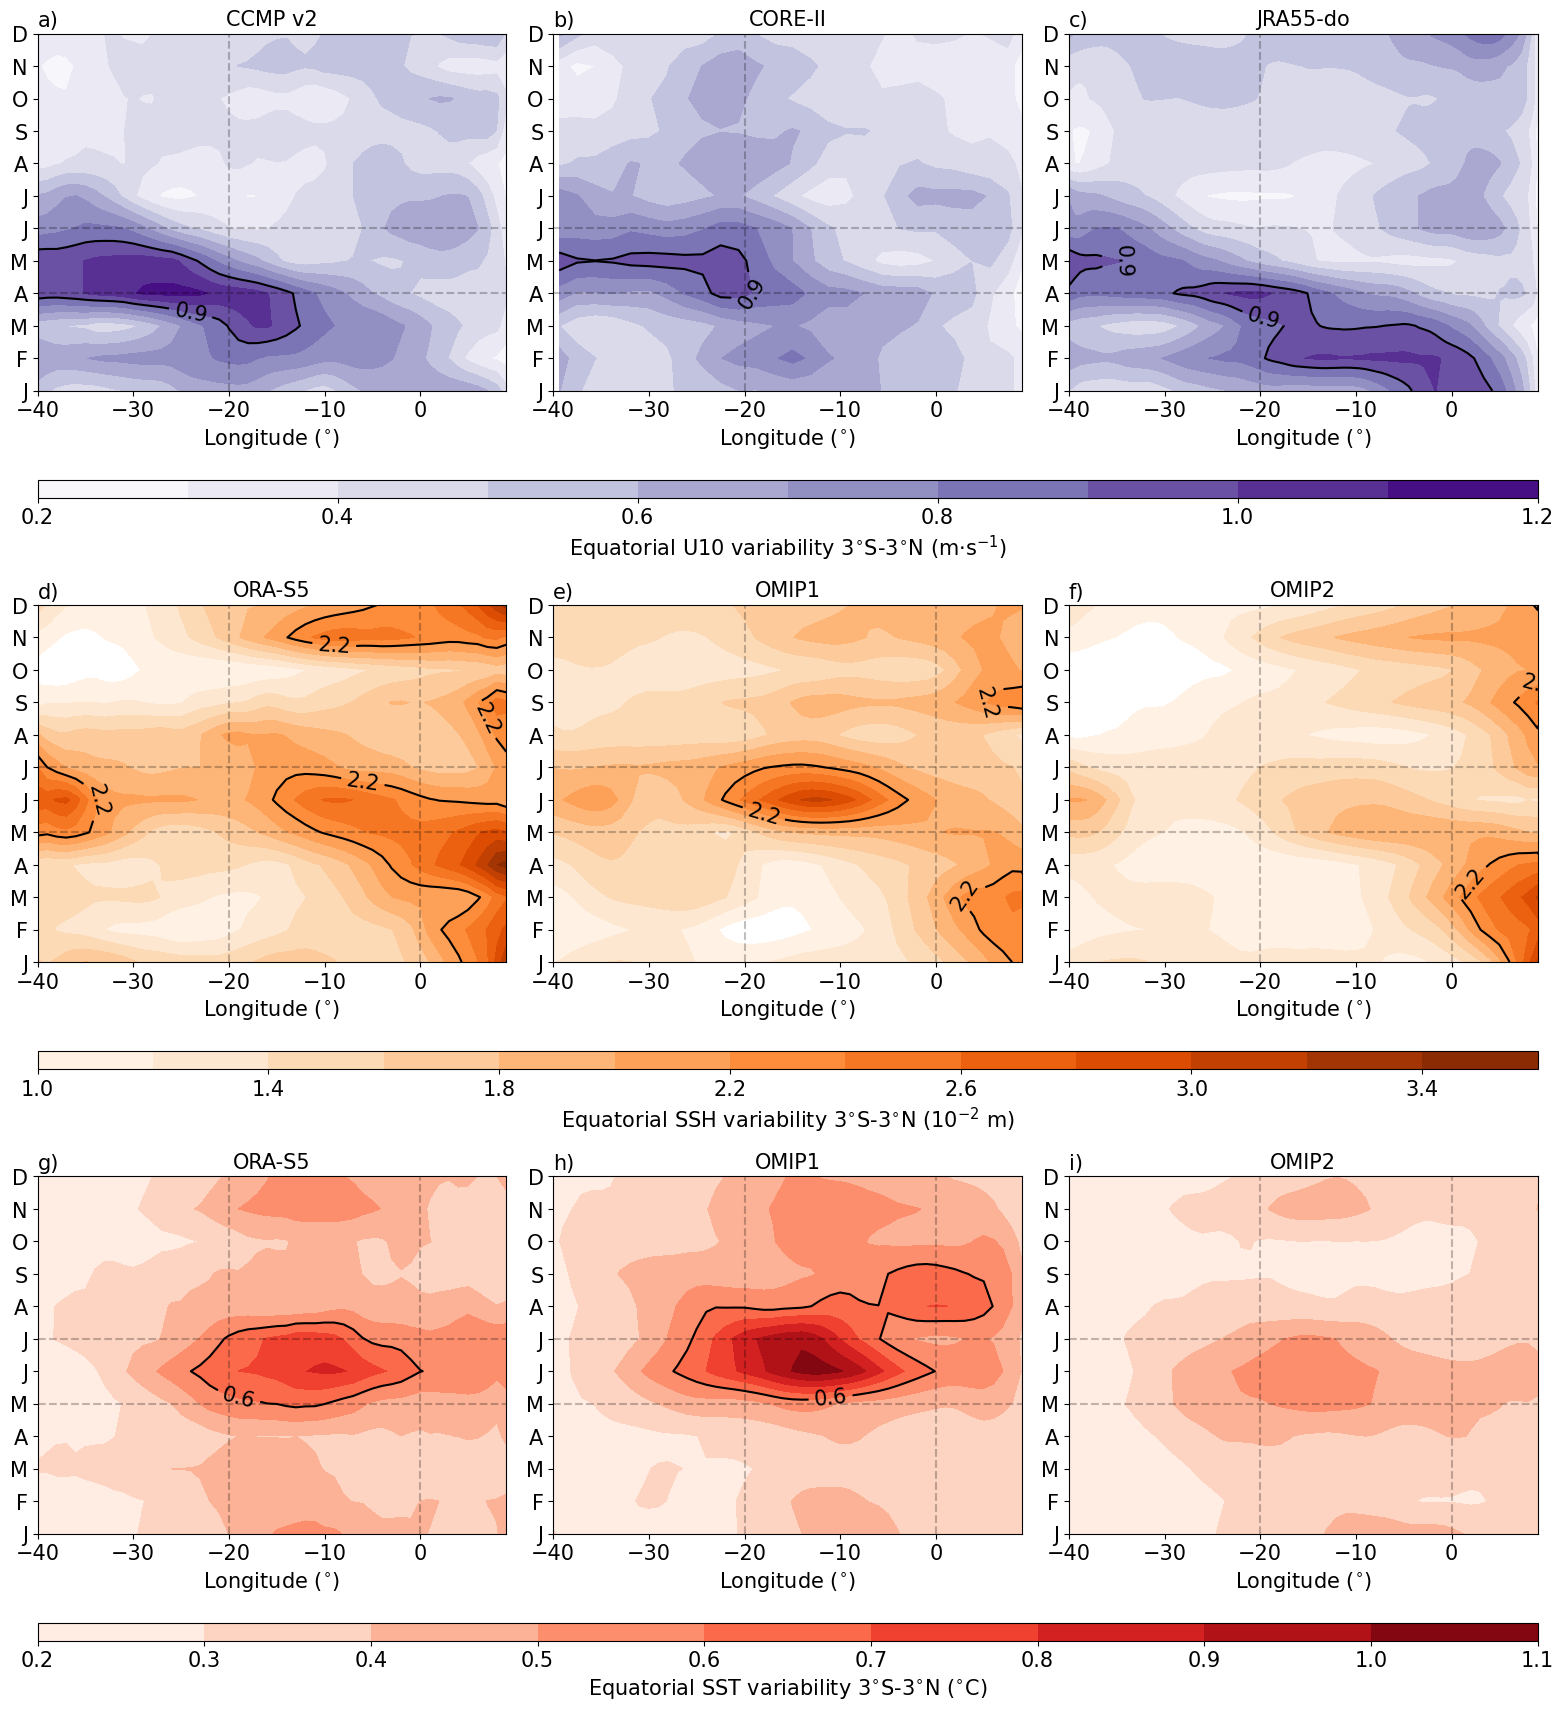

In [23]:
f,ax = plt.subplots(3,3,figsize=[15,15])
f.patch.set_facecolor('white')
cmap = plt.cm.Purples
levels= np.arange(0.2,1.3,0.1)


cmap1 = plt.cm.Oranges
levels1= np.arange(1,3.8,0.2)


cmap2 = plt.cm.Reds
levels2= np.arange(0.2,1.2,0.1)



ftz=15
ax=ax.ravel()
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.6, wspace=0.1)

cax0 = inset_axes(ax[0],
                 width='320%',
                 height='5%',
                 loc = 'lower left',
                 bbox_to_anchor=(0,-0.3,1,1),
                 bbox_transform=ax[0].transAxes,
                 borderpad=0)

cax2 = inset_axes(ax[3],
                 width='320%',
                 height='5%',
                 loc = 'lower left',
                 bbox_to_anchor=(0,-0.3,1,1),
                 bbox_transform=ax[3].transAxes,
                 borderpad=0)


cax4 = inset_axes(ax[6],
                 width='320%',
                 height='5%',
                 loc = 'lower left',
                 bbox_to_anchor=(0,-0.3,1,1),
                 bbox_transform=ax[6].transAxes,
                 borderpad=0)


alpha = 0.25



p0 = ax[0].contourf(std_uwinda_ccmp_eq_dtd.lon,
               std_uwinda_ccmp_eq_dtd.month,
               std_uwinda_ccmp_eq_dtd,
               cmap=cmap,
               levels=levels)

cs0 = ax[0].contour(std_uwinda_ccmp_eq_dtd.lon,
               std_uwinda_ccmp_eq_dtd.month,
               std_uwinda_ccmp_eq_dtd,colors='black',
               levels=[0.9])


ax[0].clabel(cs0, cs0.levels, inline=True, fontsize=ftz)


ax[0].axvline(-40,color='black',linestyle='--',alpha=alpha)
ax[0].axvline(-20,color='black',linestyle='--',alpha=alpha)
ax[0].axhline(4,color='black',linestyle='--',alpha=alpha)
ax[0].axhline(6,color='black',linestyle='--',alpha=alpha)

ax[0].tick_params(labelsize=ftz)
ax[0].set_yticks(std_uwinda_ccmp_eq_dtd.month.values)
ax[0].set_yticklabels(month,fontsize = ftz)
ax[0].set_title('CCMP v2',fontsize=ftz)
ax[0].set_xlim([-40,9])
ax[0].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)


p0 = ax[1].contourf(std_uasa_core2_eq_dataset_monthly_mean.lon,
               std_uasa_core2_eq_dataset_monthly_mean.month,
               std_uasa_core2_eq_dataset_monthly_mean,
               cmap=cmap,
               levels=levels)


cs0 = ax[1].contour(std_uasa_core2_eq_dataset_monthly_mean.lon,
               std_uasa_core2_eq_dataset_monthly_mean.month,
               std_uasa_core2_eq_dataset_monthly_mean,colors='black',
               levels=[0.9])


ax[1].clabel(cs0, cs0.levels, inline=True, fontsize=ftz)

ax[1].axvline(-40,color='black',linestyle='--',alpha=alpha)
ax[1].axvline(-20,color='black',linestyle='--',alpha=alpha)
ax[1].axhline(4,color='black',linestyle='--',alpha=alpha)
ax[1].axhline(6,color='black',linestyle='--',alpha=alpha)
ax[1].tick_params(labelsize=ftz)
ax[1].set_yticks(std_uasa_core2_eq_dataset_monthly_mean.month.values)
ax[1].set_yticklabels(month,fontsize = ftz)
ax[1].set_title('CORE-II',fontsize=ftz)
ax[1].set_xlim([-40,9])
ax[1].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)

cbar = plt.colorbar(p0,cax0,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label('Equatorial U10 variability 3$^{\circ}$S-3$^{\circ}$N (m$\cdot$s$^{-1}$)',fontsize=ftz)

ax[2].contourf(std_uasa_jra55_eq_dataset_monthly_mean.lon,
               std_uasa_jra55_eq_dataset_monthly_mean.month,
               std_uasa_jra55_eq_dataset_monthly_mean,
               cmap=cmap,
               levels=levels)

cs0 = ax[2].contour(std_uasa_jra55_eq_dataset_monthly_mean.lon,
               std_uasa_jra55_eq_dataset_monthly_mean.month,
               std_uasa_jra55_eq_dataset_monthly_mean,colors='black',
               levels=[0.9])


ax[2].clabel(cs0, cs0.levels, inline=True, fontsize=ftz)

ax[2].axvline(-40,color='black',linestyle='--',alpha=alpha)
ax[2].axvline(-20,color='black',linestyle='--',alpha=alpha)
ax[2].axhline(4,color='black',linestyle='--',alpha=alpha)
ax[2].axhline(6,color='black',linestyle='--',alpha=alpha)
ax[2].tick_params(labelsize=ftz)
ax[2].set_yticks(std_uasa_jra55_eq_dataset_monthly_mean.month.values)
ax[2].set_yticklabels(month,fontsize = ftz)
ax[2].set_title('JRA55-do',fontsize=ftz)
ax[2].set_xlim([-40,9])
ax[2].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)




p2 = ax[3].contourf(std_zosa_oras5_eq_dtd.lon,
               std_zosa_oras5_eq_dtd.month,
               std_zosa_oras5_eq_dtd*100,
               cmap=cmap1,
               levels=levels1)

cs0 = ax[3].contour(std_zosa_oras5_eq_dtd.lon,
               std_zosa_oras5_eq_dtd.month,
               std_zosa_oras5_eq_dtd*100,colors='black',
               levels=[2.2])
ax[3].clabel(cs0, cs0.levels, inline=True, fontsize=ftz)


ax[3].axvline(-20,color='black',linestyle='--',alpha=alpha)
ax[3].axvline(0,color='black',linestyle='--',alpha=alpha)
ax[3].axhline(5,color='black',linestyle='--',alpha=alpha)
ax[3].axhline(7,color='black',linestyle='--',alpha=alpha)
ax[3].tick_params(labelsize=ftz)
ax[3].set_yticks(std_zosa_eq_omip1_mean_monthly_mean.month.values)
ax[3].set_yticklabels(month,fontsize = ftz)
ax[3].set_title('ORA-S5',fontsize=ftz)
ax[3].set_xlim([-40,9])
ax[3].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
cbar = plt.colorbar(p2,cax2,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label('Equatorial SSH variability 3$^{\circ}$S-3$^{\circ}$N (10$^{-2}$ m)',fontsize=ftz)



p2 = ax[4].contourf(std_zosa_eq_omip1_mean_monthly_mean.lon,
               std_zosa_eq_omip1_mean_monthly_mean.month,
               std_zosa_eq_omip1_mean_monthly_mean*100,
               cmap=cmap1,
               levels=levels1)

cs0 = ax[4].contour(std_zosa_eq_omip1_mean_monthly_mean.lon,
               std_zosa_eq_omip1_mean_monthly_mean.month,
               std_zosa_eq_omip1_mean_monthly_mean*100,colors='black',
               levels=[2.2])
ax[4].clabel(cs0, cs0.levels, inline=True, fontsize=ftz)


ax[4].axvline(-20,color='black',linestyle='--',alpha=alpha)
ax[4].axvline(0,color='black',linestyle='--',alpha=alpha)
ax[4].axhline(5,color='black',linestyle='--',alpha=alpha)
ax[4].axhline(7,color='black',linestyle='--',alpha=alpha)
ax[4].tick_params(labelsize=ftz)
ax[4].set_yticks(std_zosa_eq_omip1_mean_monthly_mean.month.values)
ax[4].set_yticklabels(month,fontsize = ftz)
ax[4].set_title('OMIP1',fontsize=ftz)
ax[4].set_xlim([-40,9])
ax[4].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)


ax[5].contourf(std_zosa_eq_omip2_mean_monthly_mean.lon,
               std_zosa_eq_omip2_mean_monthly_mean.month,
               std_zosa_eq_omip2_mean_monthly_mean*100,
               cmap=cmap1,
               levels=levels1)
cs0 = ax[5].contour(std_zosa_eq_omip2_mean_monthly_mean.lon,
               std_zosa_eq_omip2_mean_monthly_mean.month,
               std_zosa_eq_omip2_mean_monthly_mean*100,colors='black',
               levels=[2.2])
ax[5].clabel(cs0, cs0.levels, inline=True, fontsize=ftz)


ax[5].axvline(-20,color='black',linestyle='--',alpha=alpha)
ax[5].axvline(0,color='black',linestyle='--',alpha=alpha)
ax[5].axhline(5,color='black',linestyle='--',alpha=alpha)
ax[5].axhline(7,color='black',linestyle='--',alpha=alpha)
ax[5].tick_params(labelsize=ftz)
ax[5].set_yticks(std_zosa_eq_omip2_mean_monthly_mean.month.values)
ax[5].set_yticklabels(month,fontsize = ftz)
ax[5].set_title('OMIP2',fontsize=ftz)
ax[5].set_xlim([-40,9])
ax[5].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)



p4 = ax[6].contourf(std_ssta_oras5_eq_dtd.lon,
               std_ssta_oras5_eq_dtd.month,
               std_ssta_oras5_eq_dtd,
               cmap=cmap2,
               levels=levels2)
cs0 = ax[6].contour(std_ssta_oras5_eq_dtd.lon,
               std_ssta_oras5_eq_dtd.month,
               std_ssta_oras5_eq_dtd,colors='black',
               levels=[0.6])
ax[6].clabel(cs0, cs0.levels, inline=True, fontsize=ftz)



ax[6].axvline(-20,color='black',linestyle='--',alpha=alpha)
ax[6].axvline(0,color='black',linestyle='--',alpha=alpha)
ax[6].axhline(5,color='black',linestyle='--',alpha=alpha)
ax[6].axhline(7,color='black',linestyle='--',alpha=alpha)
ax[6].tick_params(labelsize=ftz)
ax[6].set_yticks(std_zosa_eq_omip1_mean_monthly_mean.month.values)
ax[6].set_yticklabels(month,fontsize = ftz)
ax[6].set_title('ORA-S5',fontsize=ftz)
ax[6].set_xlim([-40,9])
ax[6].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)



p4 = ax[7].contourf(std_ssta_omip1_eq_mean_monthly_mean.lon,
               std_ssta_omip1_eq_mean_monthly_mean.month,
               std_ssta_omip1_eq_mean_monthly_mean,
               cmap=cmap2,
               levels=levels2)

cs0 = ax[7].contour(std_ssta_omip1_eq_mean_monthly_mean.lon,
               std_ssta_omip1_eq_mean_monthly_mean.month,
               std_ssta_omip1_eq_mean_monthly_mean,colors='black',
               levels=[0.6])
ax[7].clabel(cs0, cs0.levels, inline=True, fontsize=ftz)

ax[7].axvline(-20,color='black',linestyle='--',alpha=alpha)
ax[7].axvline(0,color='black',linestyle='--',alpha=alpha)
ax[7].axhline(5,color='black',linestyle='--',alpha=alpha)
ax[7].axhline(7,color='black',linestyle='--',alpha=alpha)
ax[7].tick_params(labelsize=ftz)
ax[7].set_yticks(std_zosa_eq_omip1_mean_monthly_mean.month.values)
ax[7].set_yticklabels(month,fontsize = ftz)
ax[7].set_title('OMIP1',fontsize=ftz)
ax[7].set_xlim([-40,9])
cbar = plt.colorbar(p4,cax4,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label('Equatorial SST variability 3$^{\circ}$S-3$^{\circ}$N ($^{\circ}$C)',fontsize=ftz)

ax[7].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)


p2 = ax[8].contourf(std_ssta_omip2_eq_mean_monthly_mean.lon,
               std_ssta_omip2_eq_mean_monthly_mean.month,
               std_ssta_omip2_eq_mean_monthly_mean,
               cmap=cmap2,
               levels=levels2)

cs0 = ax[8].contour(std_ssta_omip2_eq_mean_monthly_mean.lon,
               std_ssta_omip2_eq_mean_monthly_mean.month,
               std_ssta_omip2_eq_mean_monthly_mean,colors='black',
               levels=[0.6])
ax[8].clabel(cs0, cs0.levels, inline=True, fontsize=ftz)

ax[8].axvline(-20,color='black',linestyle='--',alpha=alpha)
ax[8].axvline(0,color='black',linestyle='--',alpha=alpha)
ax[8].axhline(5,color='black',linestyle='--',alpha=alpha)
ax[8].axhline(7,color='black',linestyle='--',alpha=alpha)
ax[8].tick_params(labelsize=ftz)
ax[8].set_yticks(std_zosa_eq_omip2_mean_monthly_mean.month.values)
ax[8].set_yticklabels(month,fontsize = ftz)
ax[8].set_title('OMIP2',fontsize=ftz)
ax[8].set_xlim([-40,9])
ax[8].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)




ax[0].text(0,1.02,'a)',transform=ax[0].transAxes,size=ftz)
ax[1].text(0,1.02,'b)',transform=ax[1].transAxes,size=ftz)

ax[2].text(0,1.02,'c)',transform=ax[2].transAxes,size=ftz)
ax[3].text(0,1.02,'d)',transform=ax[3].transAxes,size=ftz)


ax[4].text(0,1.02,'e)',transform=ax[4].transAxes,size=ftz)
ax[5].text(0,1.02,'f)',transform=ax[5].transAxes,size=ftz)
ax[6].text(0,1.02,'g)',transform=ax[6].transAxes,size=ftz)
ax[7].text(0,1.02,'h)',transform=ax[7].transAxes,size=ftz)
ax[8].text(0,1.02,'i)',transform=ax[8].transAxes,size=ftz)

plt.savefig(path_fig+'figure_05.png',bbox_inches='tight',dpi=300)